<a href="https://colab.research.google.com/github/rimosoma/ML_for_healt/blob/main/lab6healt_central_limit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# --- PROFESSOR'S IMPORTS (PRESERVED) ---
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import erfc, erfcinv




In [2]:
# --- HELPER FUNCTIONS FROM PROFESSOR'S CODE (PRESERVED) ---
# Extracted to allow reuse in loops without modifying the logic lines

def tsco(x,mu):
    """
    T-SCORE:

    WHAT IS IT? (The "Universal Translator"):
    This formula transforms your specific data (measured in grams, volts, etc.) into a
    pure, dimensionless number to compare against the Standard Normal world (mean=0, var=1).

    Formula Breakdown: t = (m - mu) / (s / sqrt(Ns))

    1. THE NUMERATOR (m - mu) -> CENTERING (Offset):
       It measures the raw distance. By subtracting 'mu', we shift the center to 0.

    2. THE DENOMINATOR (s / sqrt(Ns)) -> SCALING (Unit Conversion):
       This is the "Standard Error". Dividing by this value changes the unit of measurement.
       *** CRITICAL INTUITION ***:
       - On the Standard Curve, the unit "1.0" IS EQUAL TO "1 Standard Error".
       - So, a t-score of 3.0 literally means "The mean is 3 Standard Errors away from the target".

    THE RESULT (T-value):
    The output 'tt' is a coordinate on the standard map. We assume this map is a Student's T
    (which looks like a Standard Normal). We then calculate the area (p-value) beyond this
    coordinate to see how rare such a distance is.
    """

    Ns = len(x)
    m = np.mean(x)
    s2 = np.sum((x-m)**2)/(Ns-1)
    s=np.sqrt(s2)
    tt = (m-mu)/s*np.sqrt(Ns)
    return tt

def exc_kurt(x):
    """
    EXCESS KURTOSIS (Test on the Tails/Peakedness):
    Intuitively, this checks the shape of the "tails" (extremes) of the distribution.
    A perfect Gaussian has Kurtosis = 3, so "Excess Kurtosis" should be 0.

    - Interpretation:
        * Result near 0: The shape matches a Gaussian.
        * Positive: "Fat tails" (more outliers than expected).
        * Negative: "Thin tails" (flatter peak than expected).

    Note: The complex formula involving (N-1)/(N-2)... is the "unbiased estimator"
    to correct errors when sample size N is small.
    """
    N=len(x)
    m=np.sum(x)/N
    s4=np.sum((x-m)**4)/N
    s2=np.sum((x-m)**2)/N
    k0=s4/s2**2
    A = (N-1)/(N-2)/(N-3)*((N+1)*k0-3*(N-1));
    return A

def A_D(x,mu,sigma):
    """
    ANDERSON-DARLING STATISTIC (A^2 Test):
    Intuitively, this is a strict test that checks the *entire* shape of the distribution,
    comparing the data's Cumulative Distribution Function (CDF) vs the theoretical Gaussian CDF.

    - Unlike other tests, it gives extra weight to the tails (where Gaussians often fail).
    - Interpretation:
        * Returns a distance value 'A^2'.
        * The LARGER the value, the LESS Gaussian the data is.
    """
# -N -\sum_{i=1}^{N}\frac{2i-1}{N} \left[ \ln
# F(y_i)+\ln(1-F(y_{N+1-i}))\right]
    N = len(x)
    xsd = -np.sort(-x)
    Fd = 1-0.5*erfc((xsd-mu)/np.sqrt(2)/sigma);
    Fu = np.flipud(Fd);
    ii=np.arange(1,N+1)
    a=(2*ii-1)/N;
    out = -N-a@(np.log(Fu)+np.log(1-Fd));
    return out






In [3]:
# --- STUDENT EXTENSION: SIMULATION FUNCTION ---
# Encapsulates the Monte Carlo simulation for p-values
# to avoid code duplication in the loops below.
def run_null_hypothesis_simulation(Ns, Nexp, mu, sigma):
    """
    MONTE CARLO SIMULATION FOR P-VALUES:

    Intuitively, to decide if our specific sample is "weird" (non-Gaussian),
    we first need to know what "normal" looks like.

    Since we don't have simple mathematical formulas for the distribution of
    Excess Kurtosis or Anderson-Darling statistics for a specific sample size Ns,
    we obtain them empirically by simulation.

    What this function does:
    1. It generates 'Nexp' (e.g., 10,000) datasets that are GUARANTEED to be Gaussian (Hypothesis H0).
    2. It calculates the statistics (T-score, Kurtosis, A-D) for each of these perfect datasets.
    3. It returns these 10,000 values to build the "Null Distribution".

    Later, we compare our specific experiment's values against this distribution
    to calculate the p-value (probability of seeing such a result by pure chance).
    """
    valT = np.zeros((Nexp,))
    valKurt = np.zeros((Nexp,))
    valA_D = np.zeros((Nexp,))
    for k in range(Nexp):
        xg = np.random.randn(Ns)*sigma + mu # hypothesis H_0 is satisfied
        valT[k] = tsco(xg,mu)# find t-score for vector xg that satisfies hypothesis H_0
        valKurt[k] = exc_kurt(xg) # find kurtosis for vector xg that satisfies hypothesis H_0
        valA_D[k] = A_D(xg,mu,sigma)# find A_D for vector xg that satisfies hypothesis H_0
    return valT, valKurt, valA_D





---------------------------------------
---------------------------------------
📋​📋​TASK 1: BOX-MULLER METHOD
Checking Gaussianity for Ns = 100, 500, 1000
---------------------------------------
📍​---> Testing Box-Muller with Ns = 100
Results in term of Gaussianity for Ns=100:

[P-VALUE COMPUTATION] ⬇️⬇️⬇️
  -  t-score: 0.6265          (p-value: 0.5324)

[P-VALUE SIMULATION] ⬇️⬇️⬇️ (Running 10000 experiments for Null Hypothesis (Gaussian) with Ns=100...)
  -  Exc Kurt: 0.3202         (p-value: 0.4689)
  -  A-D stat: 1.2211         (p-value: 0.2647)
  >> 👍​DO NOT REJECT Gaussian Hypothesis
---------------------------------------
📍​---> Testing Box-Muller with Ns = 500
Results in term of Gaussianity for Ns=500:

[P-VALUE COMPUTATION] ⬇️⬇️⬇️
  -  t-score: 1.2312          (p-value: 0.2188)

[P-VALUE SIMULATION] ⬇️⬇️⬇️ (Running 10000 experiments for Null Hypothesis (Gaussian) with Ns=500...)
  -  Exc Kurt: 0.0618         (p-value: 0.7719)
  -  A-D stat: 1.4492         (p-value: 0.1894)
  >>

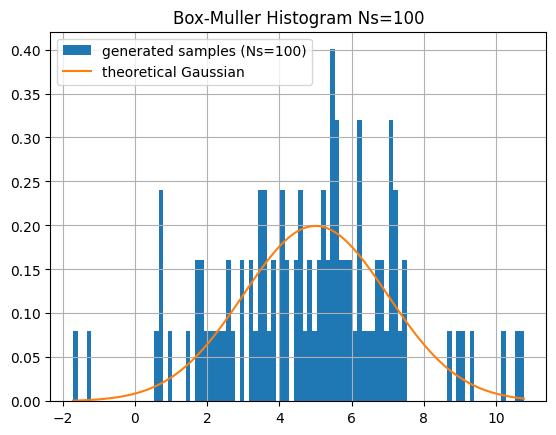

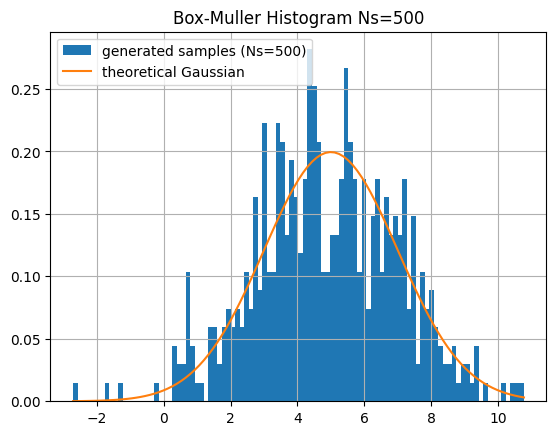

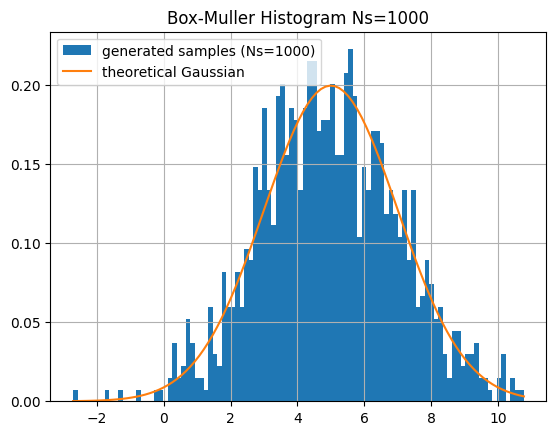

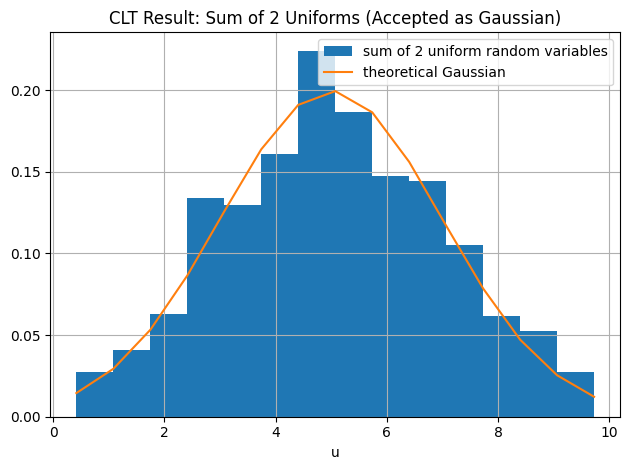

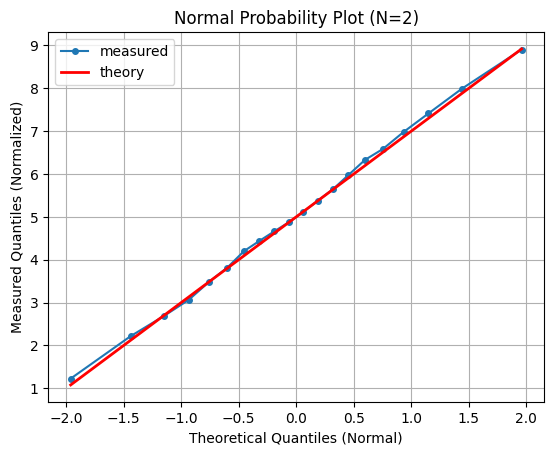

In [4]:
# --- STUDENT EXTENSION: MAIN EXECUTION ---
if __name__ == "__main__":
    plt.close('all')

    # Common parameters
    mu = 5 # desired mean
    sigma = 2 # desired standard deviation
    Nexp = 10000 # number of experiments to generate the p-value curve

    # -------------------------------------------------------------------------------
    # TASK 1: BOX-MULLER METHOD
    # "Run the script using the Box-Muller method to generate Ns = 100, 500, 1000 samples.
    print("---------------------------------------")
    print("---------------------------------------")
    print("📋​📋​TASK 1: BOX-MULLER METHOD")
    print("Checking Gaussianity for Ns = 100, 500, 1000")

    ns_values_to_test = [100, 500, 1000]

    for Ns in ns_values_to_test:
        print("---------------------------------------")
        print(f"📍​---> Testing Box-Muller with Ns = {Ns}")
        np.random.seed(354977) # Reset seed for reproducibility

        # --- PROFESSOR'S CODE BLOCK: BOX-MULLER GENERATION ---
        # (Copied exactly from original "if case == 'Box-Muller':")
        xUnif=np.random.rand(Ns,2) # uniformly distributed in [0,1]
        sigma2 = sigma**2 # desired variance, to show the workness also without sigma = 1 and mu = 0
        r = np.sqrt(-2*sigma2*np.log(1-xUnif[:,0])) #radius
        theta = xUnif[:,1]*2*np.pi                  #angle
        x=r*np.cos(theta)+mu                        #converted values


        plt.figure()
        a=plt.hist(x,bins=100,density=True,label=f'generated samples (Ns={Ns})')
        pdf = stats.norm.pdf(x = a[1], loc=mu, scale=sigma) #Compute the theoretical Gaussian pdf
        plt.plot(a[1],pdf,label='theoretical Gaussian')
        plt.legend()
        plt.grid()
        plt.title(f'Box-Muller Histogram Ns={Ns}')


        # -----------------------------------------------------

        # --- PROFESSOR'S CODE BLOCK: STATISTICS CALCULATION ---
        tx = tsco(x,mu)
        # print('absolute value of t-score for x is ',np.abs(tx)) # moved to summary below
        ku = exc_kurt(x)
        # print('absolute vlue of excess kurtosis for x is ',np.abs(ku))
        a2 = A_D(x,mu,sigma)
        # print('Anderson-Darling test a^2 for x is ',a2)
        # ------------------------------------------------------

        # Run simulation for this specific Ns (since Kurtosis/AD depend on Ns)
        valT, valKurt, valA_D = run_null_hypothesis_simulation(Ns, Nexp, mu, sigma)

        # Calculate P-values ( two-tail for t-score, one-tail for others)
        # t-score p-value
        p_t = 2 * (1 - stats.t.cdf(np.abs(tx), Ns-1))

        # Excess Kurtosis p-value (Empirical)
        # We check fraction of simulated |Kurt| > measured |Kurt|
        p_kurt = np.sum(np.abs(valKurt) > np.abs(ku)) / Nexp

        # Anderson-Darling p-value (Empirical)
        # We check fraction of simulated A^2 > measured A^2
        p_ad = np.sum(valA_D > a2) / Nexp

        print(f"Results in term of Gaussianity for Ns={Ns}:")
        print("\n[P-VALUE COMPUTATION] ⬇️⬇️⬇️")
        print(f"  -  t-score: {np.abs(tx):.4f}          (p-value: {p_t:.4f})")
        print(f"\n[P-VALUE SIMULATION] ⬇️⬇️⬇️ (Running {Nexp} experiments for Null Hypothesis (Gaussian) with Ns={Ns}...)")
        print(f"  -  Exc Kurt: {np.abs(ku):.4f}         (p-value: {p_kurt:.4f})")
        print(f"  -  A-D stat: {a2:.4f}         (p-value: {p_ad:.4f})")


        #it is correct tu use ad as the judge, is the most reliable
        if p_ad < 0.05:
             print("  >> 👎​REJECT Gaussian Hypothesis (based on A-D)")
        else:
             print("  >> 👍​DO NOT REJECT Gaussian Hypothesis")










    # -------------------------------------------------------------------------------
    # TASK 2: CENTRAL LIMIT THEOREM
    # "Run again the script exploiting the central limit theorem with Ns = 1000"
    # "Which value of N allows you to get a Gaussian random variable?"

    print("---------------------------------------")
    print("---------------------------------------")
    print("📋​📋​TASK 2: CENTRAL LIMIT THEOREM ")
    print("Searching for N such that sum of N uniforms is accepted as Gaussian.")
    print("Fixed Ns = 1000")

    Ns = 1000
    # Run simulation ONCE for Ns=1000 to serve as benchmark
    valT, valKurt, valA_D = run_null_hypothesis_simulation(Ns, Nexp, mu, sigma)

    N_start = 1
    N_max = 20 # Safety limit

    gaussian_found = False

    for N in range(N_start, N_max + 1):
        # Change seed to ensure variation as requested ("Change the seed...")
        np.random.seed(50 + N)

        # --- PROFESSOR'S CODE BLOCK: CLT GENERATION ---
        # (Copied exactly from original "if case=='central-limit':")
        # Note: logic adapted to use current loop 'N' variable
        K = sigma*np.sqrt(3)
        xUnif=(np.random.rand(Ns,N)-0.5)*2*K # 2D array, uniformly distributed in -K,K (variance = sigma^2)
        # generate x as approximately Gaussian:
        x=np.sum(xUnif,axis=1)/np.sqrt(N)+mu # apply formula of central limit and add the desired mean

        # We only plot the successful one to avoid 20 open figures
        # -----------------------------------------------------

        # Calculate Stats
        tx = tsco(x, mu)
        ku = exc_kurt(x)
        a2 = A_D(x, mu, sigma)

        # Calculate P-values based on the Ns=1000 simulation
        p_t = 2 * (1 - stats.t.cdf(np.abs(tx), Ns-1))
        p_kurt = np.sum(np.abs(valKurt) > np.abs(ku)) / Nexp
        p_ad = np.sum(valA_D > a2) / Nexp

        #print(f"Checking N={N}:                 p(A-D) = {p_ad:.4f}, p(Kurt) = {p_kurt:.4f}")

        # Check pass condition (alpha = 0.05)
        # We strictly use A-D as it is often the most sensitive
        if p_ad > 0.05:
            print("---------------------------------------")
            print(f"\n👍 SUCCESS! Gaussian hypothesis NOT rejected for N = {N}")
            print(f"🏆 WINNER STATISTICS (N={N}):")
            print("[P-VALUE COMPUTATION] ⬇️⬇️⬇️")
            print(f"  -  t-score: {np.abs(tx):.4f}          (p-value: {p_t:.4f})")
            print("\n[P-VALUE SIMULATION] ⬇️⬇️⬇️")
            print(f"  -  Exc Kurt: {np.abs(ku):.4f}         (p-value: {p_kurt:.4f})")
            print(f"  -  A-D stat: {a2:.4f}         (p-value: {p_ad:.4f})")
            print("---------------------------------------")
            gaussian_found = True

            # --- PLOT THE SUCCESSFUL CASE  ---
            plt.figure()
            plt.title(f"CLT Result: Sum of {N} Uniforms (Accepted as Gaussian)")
            # Prof's plotting logic:
            Wbin = 3.5*sigma/(Ns**(1/3))
            Nbins = np.ceil((np.max(x)-np.min(x))/Wbin).astype(int)
            a=plt.hist(x,bins=Nbins,density=True,label='sum of '+str(N)+' uniform random variables')
            pdf = stats.norm.pdf(x = a[1], loc=mu, scale=sigma)
            plt.plot(a[1],pdf,label='theoretical Gaussian')
            plt.xlabel("u")
            plt.grid()
            plt.legend()
            plt.tight_layout()




            # --- PLOT Q-Q / NORMAL PROBABILITY PLOT ---
            # Prof's logic reused:
            xs = np.sort(x)
            n_quant = 20
            qs = (2*np.arange(n_quant)+1)/(2*n_quant)
            ii = np.floor(qs*Ns).astype(int)
            xqs = (xs[ii]+xs[ii+1])/2
            xqs_theory = np.sqrt(2)*erfcinv(2*(1-qs)) # Using simplified theory for Q-Q
            # If using full theory with mu/sigma:
            # xqs_theory = np.sqrt(2)*sigma*erfcinv(2*(1-qs))+mu

            plt.figure()
            plt.plot(xqs_theory,xqs,'-o',markersize=4,label='measured')
            plt.plot(xqs_theory,xqs_theory*sigma+mu,'r',linewidth=2,label='theory')
            plt.xlabel('Theoretical Quantiles (Normal)')
            plt.ylabel('Measured Quantiles (Normalized)')
            plt.title(f'Normal Probability Plot (N={N})')
            plt.legend()
            plt.grid()

            break # Stop finding N

    if not gaussian_found:
        print(f"👎​Warning: Did not find Gaussian convergence up to N={N_max}")

    print("\nEnd of Laboratory 6 Gaussianity Tests.")
    plt.show()
